In [1]:
import torch
import math
import matplotlib.pyplot as plt

In [2]:
names = open('names.txt', 'r').read().splitlines()

In [3]:
M = torch.zeros(27, 27,dtype=torch.float32)

In [4]:
chars = list(sorted(set(''.join(names))))

chars.append('.')

char_to_idx = {c: i+1 for i, c in enumerate(chars)}
char_to_idx['.'] = 0  # '.' is the end of name marker
idx_to_char = {i: c for c, i in char_to_idx.items()}

for name in names:
    name = ['.'] + list(name.lower()) + ['.']  # Append '.' to mark end of name
    tuples = zip(name, name[1:]) 
    for a, b in tuples:
        i = char_to_idx[a]
        j = char_to_idx[b]
        M[i, j] += 1

M += 1

In [5]:
P = M / M.sum(dim=1, keepdim=True)

(-0.5, 26.5, 26.5, -0.5)

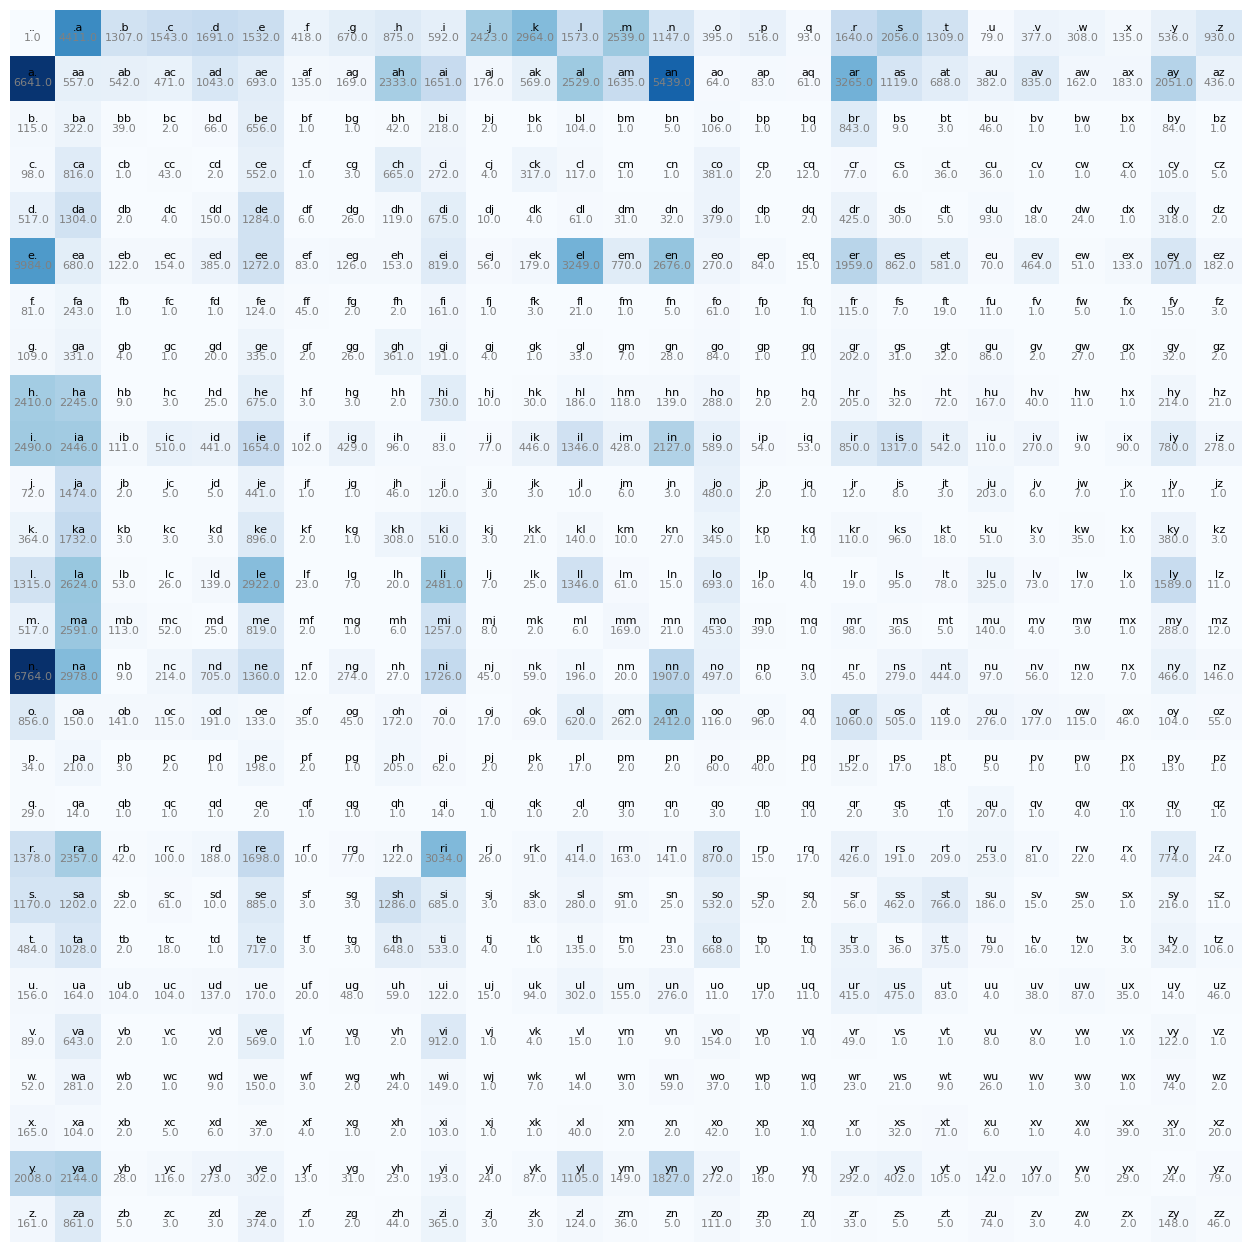

In [6]:
plt.figure(figsize=(16, 16))
plt.imshow(M, cmap='Blues')
for i in range(27):
    for j in range(27):
        str = idx_to_char[i] + idx_to_char[j]
        plt.text(j, i, str, ha='center', va='bottom', fontsize=8, color='black')
        #plt.text(j, i, f'{P[i, j]:.2f}', ha='center', va='center', color='black')
        plt.text(j, i, M[i,j].item(), ha='center', va='top', color='gray', fontsize=8)
plt.axis('off')

In [7]:
g = torch.Generator().manual_seed(3)
for i in range(20):

    name = ""
    prev_id = 0
    while True:
        next_id = torch.multinomial(P[prev_id], num_samples=1, replacement=True, generator=g)
        if next_id.item() == 0:
            break
        name += idx_to_char[next_id.item()]
        prev_id = next_id.item()
    #name = ''.join(name[1:])  # Remove the initial '.' and join the rest
    print(name)

selda
avachan
aravyn
dilyrisiee
jen
ahnele
benteman
jalitoscelice
dearoryi
dy
anariron
mama
sacerra
man
jarellavie
dausllakan
hetynin
wo
nndma
ckhiralearelyoe
